# Deep Learning for Coders (2020)
* Want to make this version of the course the "definitive" version. It is accompanied by a book.
* Notebooks are available at [this github repo](https://github.com/fastai/fastbook).
* Course will integrate data ethics throughout all of the content.
* What you don't need to do deep learning
  * Lots of math (high school math sufficient)
  * Lots of data (less than 50 items of data can produce great results)
  * Lots of expensive computers (much of what is needed is available for free)
* Deep learning the best-known approach in many different areas.
* Deep learning is a type of neural network learning, with origins in the 1943 McCulloch-Pitts model. In the 1950's, Rosenblatt created subtle changes and oversaw the building of the Mark I Perceptron at Cornell.
* First AI Winter thanks to Minsky and Papert's *Perceptrons*.
* In 1986, *Parallel Distributed Processing* (PDP) described how systems meeting its 8 requirements could solve lots of useful problems. Data scientists need to particularly understand the *environment*.
* Adding one extra layer of neurons would allow any mathematical model to be approximated with these neural networks. Doing deep learning with good performance practically involves adding more layers. Deep is not mystical; it just means *more layers*.
* Learning is inspired by "playing the whole game" (Prof. David Perkins)
  1. Play the whole game
  2. Make the game worth playing
  3. Work on the hard parts (deliberate practice, find the parts where I am least good at. By the end of the course, you would have done the calculus, linar algebra, and software engineering, etc. This requires tenacity and commitment, but we will know why it matters.)
* Software
  * Most DL practitioners use Python
  * PyTorch is our DL framework. 80% of research papers are with PyTorch. Designed for flexibility and developer-friendliness. No higher-level APIs.
  * fastai sits on top of PyTorch and is the most popular high-level API on top of PyTorch. They use a layered API [approach](https://arxiv.org/abs/2002.04688).
* We need NVIDIA GPU, which is supported by most deep learning frameworks. No need to buy a GPU; please use a cloud GPU. Colab is free, but it doesn't automatically save the work.
* [Forums](https://forums.fast.ai/) are really important.
* Course notebooks are [here](https://github.com/fastai/course-v4)
* Important to go through the questionnaire.

In [2]:
# Download latest version of the fastai library
!pip install fastai --upgrade
# To see documentation with hyperlinks
!pip install nbdev

     |████████████████████████████████| 358kB 4.8MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 61kB 2.7MB/s 


In [ ]:
from ipywidgets import widgets

## Image Classification

In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.PETS)/'images'

In [ ]:
def is_cat(x):
  return x[0].isupper()

In [ ]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

In [ ]:
# Specify resnet50 as architecture
learn = cnn_learner(dls, resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
# Fine tune resnet50 using 2 epochs
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.093092,0.028309,0.006766,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.070286,0.012648,0.004736,00:50
1,0.026389,0.005876,0.003383,00:49


In [ ]:
doc(learn.fine_tune)

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])

In [ ]:
is_cat, _, probs = learn.predict(img)

In [ ]:
print(f"Is this a cat?: {is_cat}.")

Is this a cat?: True.


In [ ]:
print(f"Probability it is a cat: {probs[1].item():.6f}")

Probability it is a cat: 0.989430


## Image Segmentation

In [ ]:
path = untar_data(URLs.CAMVID_TINY)

In [ ]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=get_image_files(path/"images"),
    label_func=lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str))

In [ ]:
learn = unet_learner(dls, resnet50)

In [ ]:
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.915901,2.203176,00:10


epoch,train_loss,valid_loss,time
0,1.883919,1.797179,00:04
1,1.616619,1.452628,00:04
2,1.497420,1.271363,00:04
3,1.359941,1.013830,00:04
4,1.236446,0.898304,00:04
5,1.118919,0.787973,00:04
6,1.024396,0.781494,00:04
7,0.946311,0.744631,00:04


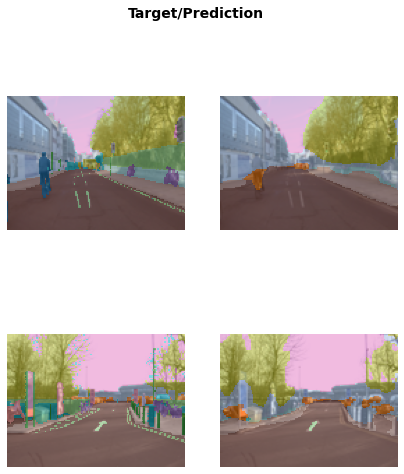

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

## Text classification

In [3]:
from fastai.text.all import *

In [4]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [5]:
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.602042,0.413482,0.811640,03:36


epoch,train_loss,valid_loss,accuracy,time
0,0.310086,0.366192,0.842440,07:42
1,0.246762,0.211465,0.917840,07:42
2,0.182462,0.190995,0.927320,07:32
3,0.167438,0.192007,0.927840,07:30


In [6]:
learn.predict("Nothing was typical about this. Everything was beautifully done in this movie, the story, the flow, the scenario, everything. I highly recommend it for mystery lovers, for anyone who wants to watch a good movie!")

('pos', tensor(1), tensor([5.5967e-04, 9.9944e-01]))

## Tabular Data

In [7]:
from fastai.tabular.all import *

In [8]:
path = untar_data(URLs.ADULT_SAMPLE)

In [9]:
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
                                  cat_names=['workclass', 'education', 'marital-status', 'occupation',
                                             'relationship', 'race'],
                                  cont_names=['age', 'fnlwgt', 'education-num'],
                                  procs=[Categorify, FillMissing, Normalize])

In [10]:
learn = tabular_learner(dls, metrics=accuracy)

In [11]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.368017,0.370959,0.825860,00:05
1,0.370944,0.358777,0.833231,00:05
2,0.348759,0.353691,0.841063,00:05
3,0.360539,0.351322,0.838145,00:05
4,0.338706,0.351552,0.843059,00:05


## Recommendation System

In [12]:
from fastai.collab import *

In [13]:
path = untar_data(URLs.ML_SAMPLE)

In [14]:
dls = CollabDataLoaders.from_csv(path/'ratings.csv')

In [17]:
learn = collab_learner(dls, y_range=(0.5, 5.5))

In [18]:
learn.fine_tune(15)

epoch,train_loss,valid_loss,time
0,1.506694,1.451365,00:00


epoch,train_loss,valid_loss,time
0,1.350777,1.399930,00:00
1,1.297063,1.286689,00:00
2,1.141450,1.051943,00:00
3,0.918675,0.801018,00:00
4,0.746602,0.702427,00:00
5,0.678300,0.673796,00:00
6,0.630194,0.662346,00:00
7,0.616086,0.655263,00:00
8,0.602810,0.650423,00:00
9,0.583465,0.647572,00:00


In [19]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,26.0,38.0,4.5,4.318786
1,92.0,89.0,4.5,4.019418
2,72.0,29.0,4.0,3.357769
3,39.0,13.0,3.0,3.499372
4,61.0,46.0,3.0,2.950612
5,86.0,77.0,4.5,3.985746
6,53.0,60.0,5.0,4.577212
7,29.0,30.0,2.0,3.163799
8,46.0,3.0,2.5,3.106740


## Questionnaire

1. Do you need these for deep learning?
  * Lots of math? False
  * Lots of data? False
  * Lots of expensive computers? False
  * A Ph.D.? False
2. Name 5 areas where deep learning is now the best tool in the world
  * Satellite/drone image interpretation
  * Document summarization
  * Finding anomalies in radiology images
  * Image captioning
  * Image super-resolution
3. First device based on principle of artificial neuron was the Mark I Perceptron at Cornell.
4. 8 requirements for parallel distributed processing
  * A set of *processing units*
  * A *state of activation*
  * An *output function* for each unit
  * A *pattern of connectivity* among units
  * A *propagation rule* for propagating patterns of activities through the network of connectivities
  * An *activation rule* for combining the inputs impinging on a unit with the current state of that unit to produce an output for the unit
  * A *learning rule* whereby paterns of connectivity are modified by experience
  * An *environment* within which the system must operate
5. What were the two theoretical misunderstandings that held back the field of neural networks?
  * That neural networks are unable to learn other types of functions, like the XOR gate. Most academics did not read in the same book that multiple layers could address these limitations
  * Although 2 layers could in theory learn any function, it was not widely appreciated that one needed many layers for good performance.
6. GPU is a graphics processing unit that can handles thousands of single tasks at the same time.
7. When running a notebook with `1+1`, we get `2`.
8. I followed each cell of the stripped notebook.
9. I completed the Jupyter Notebook online appendix.
10. It is hard to use a traditional computer program to recognize images in a photo because it is difficult to specify, in a programmatic way, the features that distinguish one image/feature from another.
11. By weight assignment, Samuel meant the parameters or values associated with the strength of each neural network connection.
12. We normally use the term "parameters" for what Samuel called "weights".
13. Picture of Samuel's view of ML model: 
  * inputs -> model 
  * weights -> model
  * model -> results -> performance -> weights
14. Why is it hard to understand why a deep learning model makes a particular prediction? Because we only have weights/parameters to draw on and these don't provide intuitive explanations for one prediction over another.
15. The universal approximation theorem shows that a neural network can solve any mathematical problem to any level of accuracy.
16. What is needed in order to train a model?
  * data, meaning both inputs and labels
  * model, meaning both connections and their parameters
  * loss function, that compares predictions to true labels
  * method for using loss function to improve model weights
17. How could feedback loop impact rollout of a predictive policing model?
  * Biased data leads to biased outcomes
  * Biased outcomes lead to biased data
  * Cycle continues
18. Do we always have to use 224x224 images with cat recognition model? No. There are probably ways to rescale this for the DL models.
19. What is difference between classification and regression? Classification predicts a class category while regression predicts a continuous value.
20. What is a validation set? Test set? Why do we need them? Validation set helps us to detect how our model performs on unseen data. It can help us diagnose under/over-fitting. We use the validation set to test a variety of models with different hyperparameters (e.g., model architecture, learning rate, optimizer, batch size, transforms/data augmentation, etc.). The test set is reserved for understanding the true performance of our model AFTER running our experiments on the validation set.
21. If I don't provide a validation set, fastai library will automatically assign 20% of the dataset as a validation set.
22. Can we always use a random sample for a validation set? No. In the case of time series prediction, it does not make sense. It would be better to use the training set on data before some time $t$, and then allocate validation data starting at time $t$ and beyond.
23. What is overfitting? It is when our model memorizes the examples from the training set and does a poor job of generalizing to unseen test data.
24. A metric is what us humans use to evaluate the performance of a model with the validation set. The loss is what the model uses to update its weights. Loss could be negative log likelihood while the metric could be accuracy (what percent of predictions were accurate).
25. How can pretrained models help? They can be used for transfer learning - to repurpose the model for a different task. This has the effect of reducing the data and computational requirements.
26. What is the "head" of a model? It is the part of the model that is newly added and specific to the new dataset.
27. Earlier features of a CNN find general patterns like edges, textures, colors, general shapes, etc. Later layers find more complicated features like people, animals, etc.
28. Image models can be used beyond photos. With novel transformations, one can do tasks like fraud detection or audio classification with images.
29. An architecture is the functional form of the model. For CNNs, this is the number, choice, and unique arrangement of hidden layers, activation functions, pooling layers, etc.
30. What is segmentation? It is assign a class label to each pixel in an image.
31. What is `y_range` used for? When do we need it? It is used for the range of collaborative filtering tasks. Tells us the range of numbers to predict for since we are not using class labels.
32. Hyperparameters are parameters about parameters. They are the decisions we take to direct the neural network learning process. It includes architecture, learning rate, batch size, optimizer, activation function, etc.
33. Best way to avoid failures when using AI in an organization? Reserve a test set to evaluate model performance. And define useful metrics.

## Further research
1. Why is GPU useful for deep learning? How is CPU different and why is it less effective for deep learning?
2. What are 3 areas where feedback loops might impact use of machine learning?
